In [3]:

from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.spatial import distance # To calculate distances
#from google.colab import files
from IPython.display import Image

uploaded = files.upload() # To import image from computer/tab

NameError: name 'files' is not defined

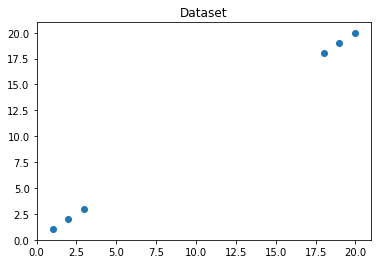

In [2]:
# Lets take an small example
x_axis = np.array([1,2,3,18,19,20])
y_axis = np.array([1,2,3,18,19,20])

data = pd.DataFrame({'x':x_axis, 'y':y_axis})

plt.plot()
plt.xlim([0,21])
plt.ylim([0,21])
plt.title('Dataset')
plt.scatter(x_axis,y_axis)
plt.show()

In [4]:
print('For ONE Cluster, all data points should be assigned to 1 Cluster\n')

kmeans = KMeans(n_clusters = 1, max_iter = 100).fit(data)
data['clusters'] = kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)

For ONE Cluster, all data points should be assigned to 1 Cluster

Clusters assigned to each datapoints :
0    0
1    0
2    0
3    0
4    0
5    0
Name: clusters, dtype: int32

Sum of Square Error/ WCSS is : 875.0


/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# ELBOW METHOD

# How many clusters should we choose ? - Elbow Method
# Select the elbow point for number of clusters
data = pd.DataFrame({'x':x_axis, 'y':y_axis})

sse = {}

for k in range(1,6): # Maximum range should be 6, as it contains only 6 data points
  kmeans = KMeans(n_clusters=k,max_iter=100).fit(data)
  data['clusters'] = kmeans.labels_
  sse[k] = kmeans.inertia_
  print("For cluster = {}, SSE/WCSS is {}".format(k, sse[k]))

plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE / WCSS")
plt.title("ELBOW METHOD")
plt.show()

print('Optimum Number of Cluster : 2')

In [ ]:
# Silhouette Score

data = pd.DataFrame({'x':x_axis, 'y':y_axis})

for n_clusters in range(0,6):# Maximum range should be 6, as it contains only 6 data points
  kmeans = KMeans(n_clusters=k,max_iter=100).fit(data)
  label = kmeans.labels_
  sil_coeff = silhouette_score(data,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(n_clusters,sil_coeff))

print('\n It is same for every cluster, so choose from Elbow Method')

In [ ]:
# Lets Take another Dataset : IRIS Dataset
# Loading the Dataset

iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.head()

In [ ]:
# Preparing Data
# Here we have the target variable ‘Type’. 
# We need to remove the target variable, used to work in an unsupervised learning 
# The iloc function is used to get the features we require. 
# We also use .values function to get an array of the dataset. 
# Note : We transformed the dataset to an array so that we can plot the graphs of the clusters

iris_X = iris_data.iloc[:, [0, 1, 2,3]].values
print(iris_X[:5,:]) # Printing First 5 Rows